### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

In [111]:
!ls 'drive/MyDrive/ML_Course/Lessons_next'

'M_3_1_Методи кластеризації'  'М_6_Створення додатків на базі LLM'


In [112]:
df = pd.read_csv("drive/MyDrive/ML_Course/Lessons_next/M_3_1_Методи кластеризації/data/marketing_campaign.csv", sep="\t")

In [113]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [114]:
df.shape

(2240, 29)

Датафрейм містить 2240 рядочків і 29 колоночок

Перевіримо на дублікати

In [115]:
has_dupes = df.duplicated().any()
print("Є дублікати рядків:", has_dupes)

Є дублікати рядків: False


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Типи даних змінних здебільшого відповідають значенням окрім Year_Birth та Dt_Customer. Обидві змінні явно є датами, проте в нашому випадку одна змінна має тип int64, а в другому - object. Відповідно, є необхідність змінити тип даних.  
Крім того, ці змінні в їх оригінальному вигляді мають мало сенсу для моделі. Краще створити на їх основі нові змінні, що будуть містити дані про вік покупців - змінна "Age", та кількість днів після реєстрації - змінна"Tenure_days"  
Також є сенс видалити декілька змінних з датафрейму, оскільки вони не несуть інформації для моделі:  
- ID - ідентифікатор клієнта  
- Z_CostContact - має однакове значення для всіх клієнтів  
- Z_Revenue - має однакове значення для всіх клієнтів

Лише одна змінна "Income" містить незначну кількість пропущених значень

In [117]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

as_of = pd.Timestamp('2025-09-10').normalize()  # оскільки ми не знаємо дати отримання даних, то фіксуємо дату для відтворюваності

df['Age'] = (as_of.year - df['Year_Birth']).astype('float')
days_with_company = (as_of - df['Dt_Customer']).dt.days
df['Tenure_days'] = days_with_company.astype('float')

In [118]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Tenure_days
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,2013-07-10 10:01:42.857142784,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15,56.19,4444.58
min,0.00,1893.00,1730.00,0.00,0.00,2012-07-30 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,29.00,4091.00
25%,2828.25,1959.00,35303.00,0.00,0.00,2013-01-16 00:00:00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,48.00,4271.75
50%,5458.50,1970.00,51381.50,0.00,0.00,2013-07-08 12:00:00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,55.00,4446.50
75%,8427.75,1977.00,68522.00,1.00,1.00,2013-12-30 06:00:00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,66.00,4620.00
max,11191.00,1996.00,666666.00,2.00,2.00,2014-06-29 00:00:00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00,132.00,4790.00
std,3246.66,11.98,25173.08,0.54,0.54,NaN,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36,11.98,202.12


Візуалізуємо розподіли числових даних для зручності аналізу

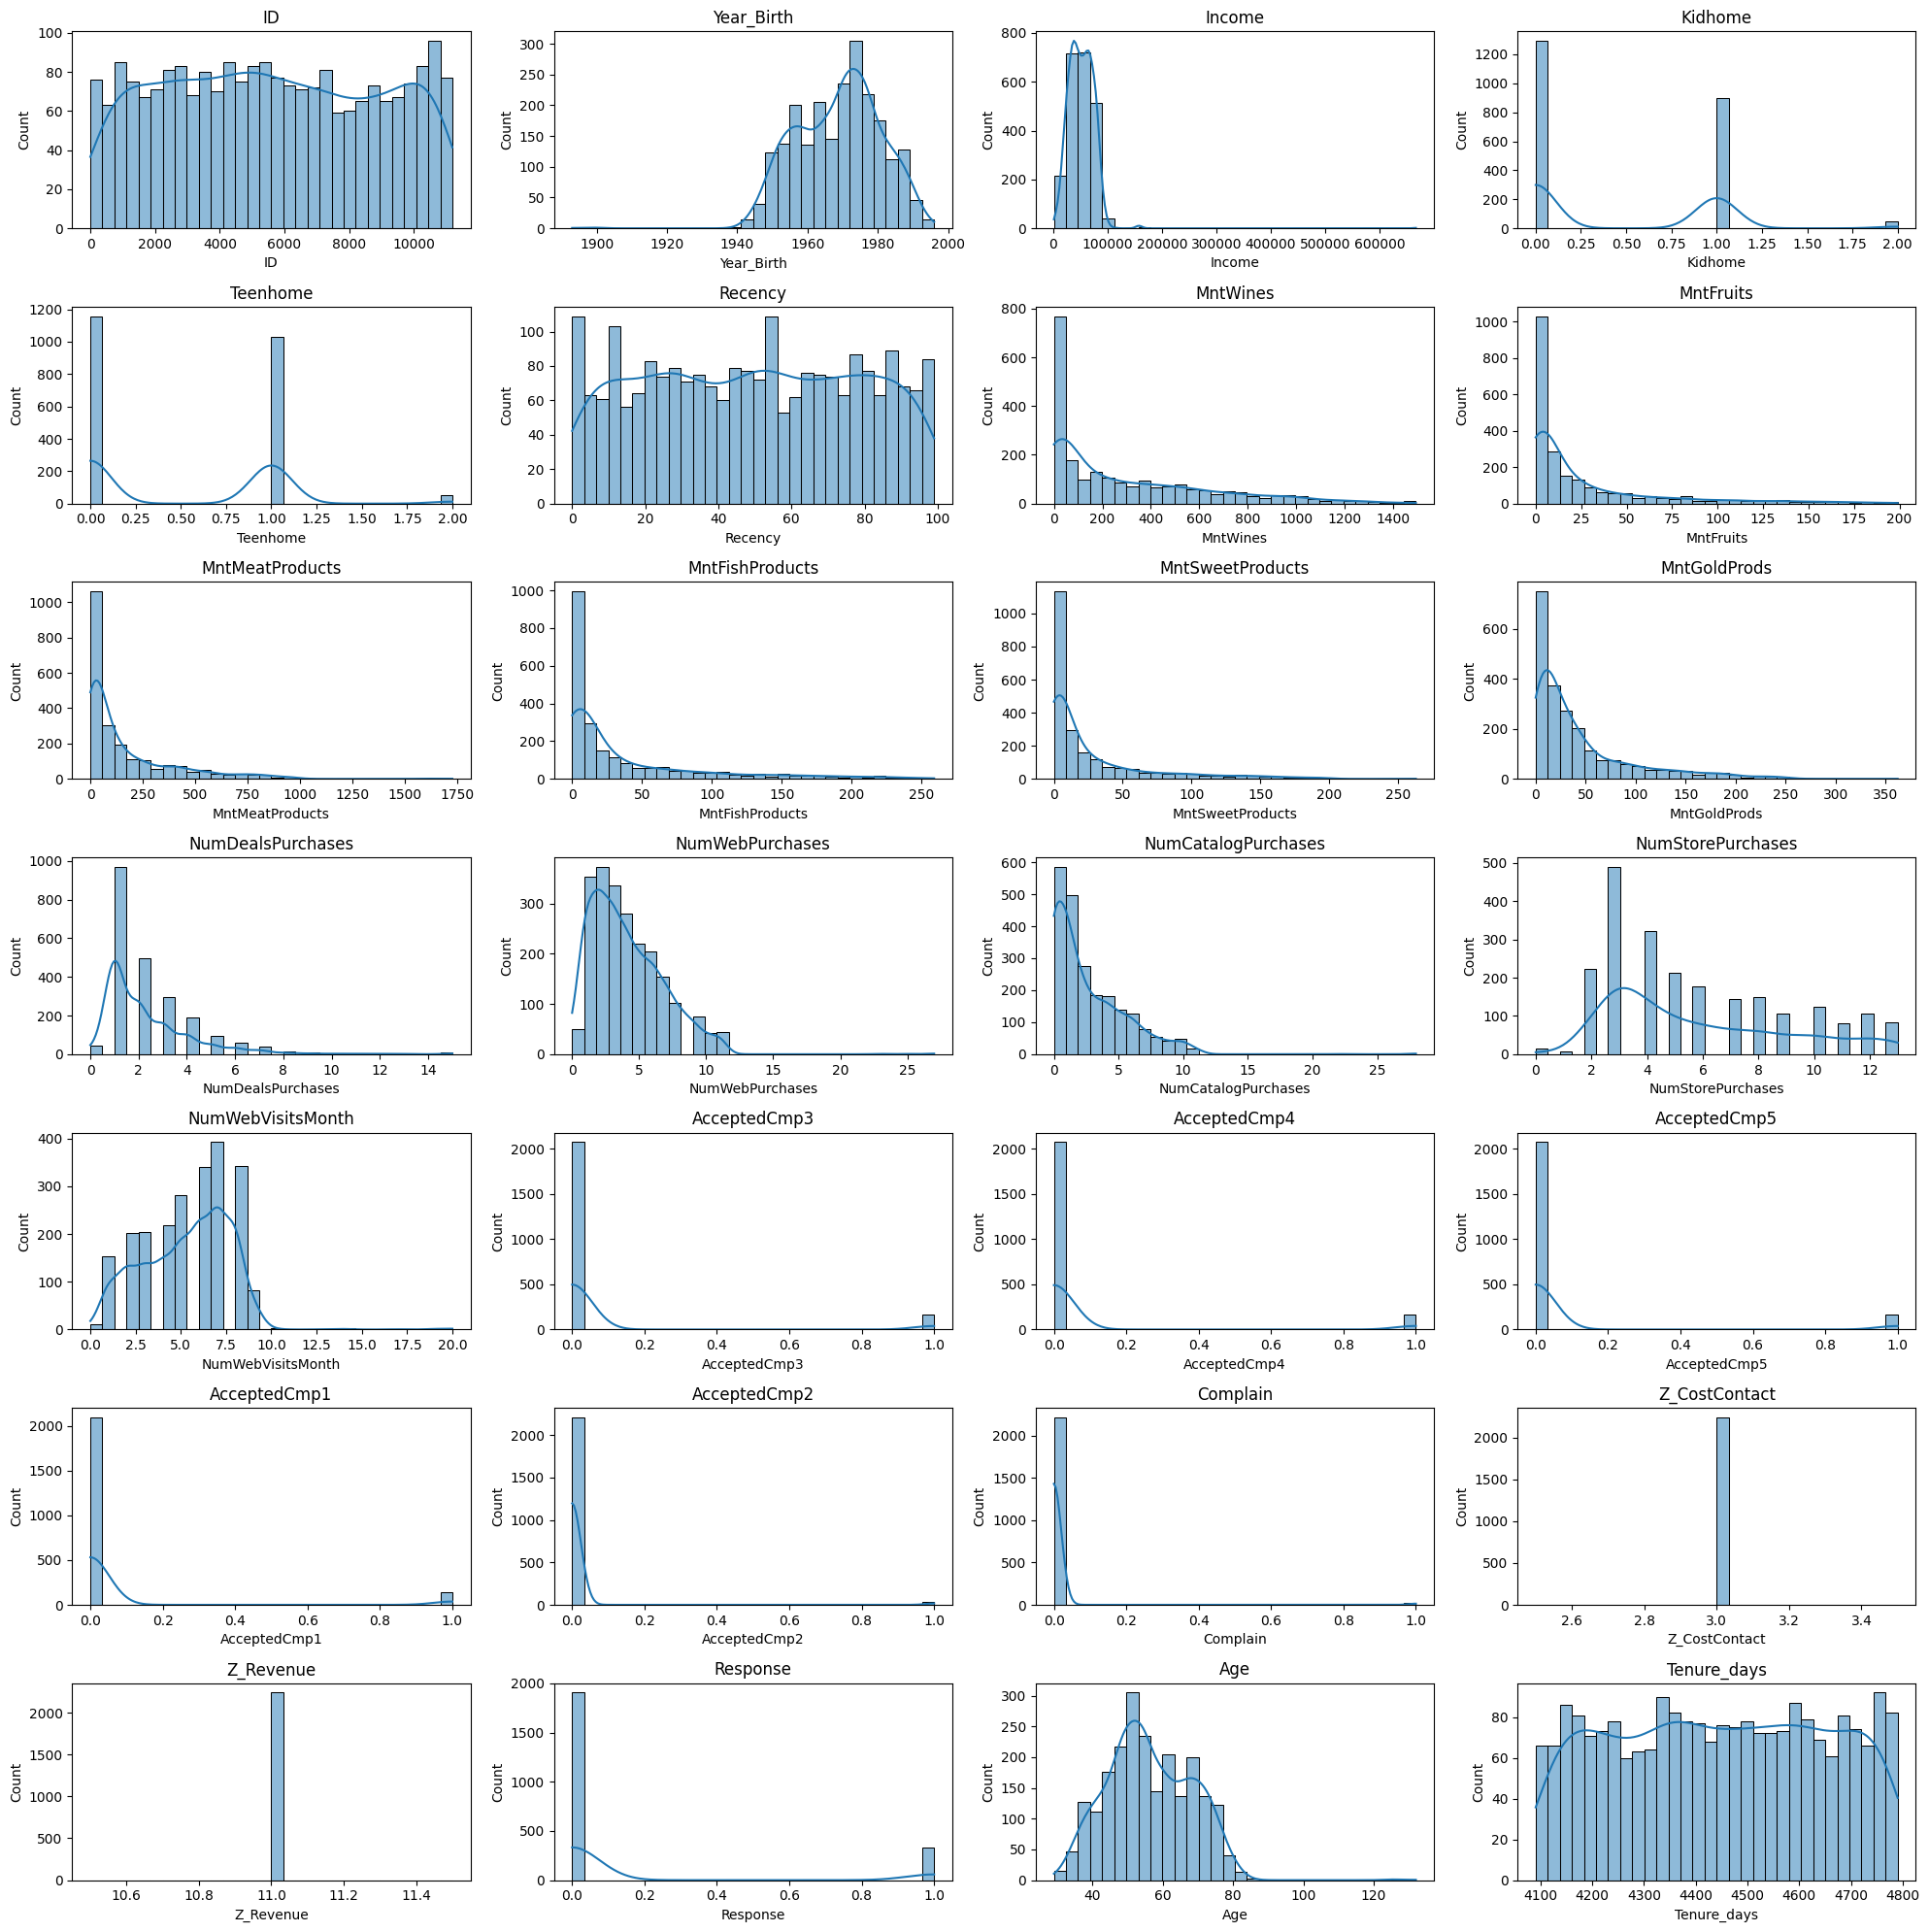

In [119]:
numeric_columns = df.select_dtypes(include = "number").columns.to_list()

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Розподіли числових змінних можна умовно поділити на декілька груп:  
- ті що мають довгі хвости, а отже потенційні викиди в даних  
- бінарні  
- ті що мають 3 значення, але не мають порядкового значення  
Окремо варто зауважити, що новостворена змінна Tenure_days має розподіл близький до рівномірного.  
А розподіл змінної Age візуально дуже схожий на нормальний розподіл. Проте бачимо наявність дуже великих значень віку, що явно вказує на помилку у введені даних. Дослідимо ці значення.

In [120]:
df[df['Age'] > 90]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Tenure_days
192,7829,1900,2n Cycle,Divorced,36640.00,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,125.00,4367.00
239,11004,1893,2n Cycle,Single,60182.00,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,132.00,4134.00
339,1150,1899,PhD,Together,83532.00,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,126.00,4367.00


Як бачимо, лише 3 записи мають потенційні помилки у значенні Age. Проте всі інші змінні мають цілком зрозумілі значення. Крім того, один із записів свідчить про високу активність одного із клієнтів, що може бути важливим в нашій кластеризації. Отже, недоцільно видаляти ці дані. Вважаю за краще заповнити значення змінної Age для цих 3 записів медіаним значенням.

In [121]:
df.loc[(df['Age'] > 90), 'Age'] = np.nan

# 6) Імп'ютація, якщо потрібно
df['Age'] = df['Age'].fillna(df['Age'].median())

Створимо новий датафрейм без зайвих колонок

In [122]:
cols_to_drop = ['ID', 'Dt_Customer', 'Year_Birth', 'Z_CostContact', 'Z_Revenue']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns]).copy()

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

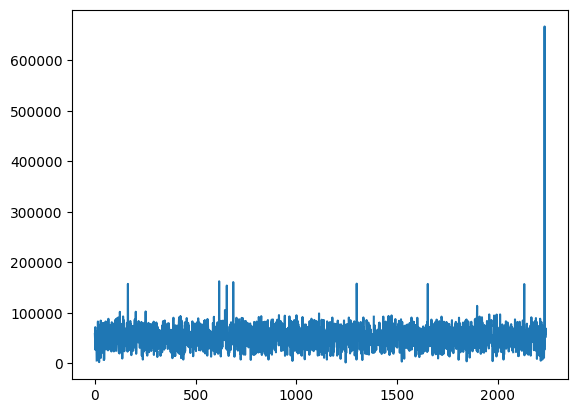

In [123]:
df_clean['Income'].plot();

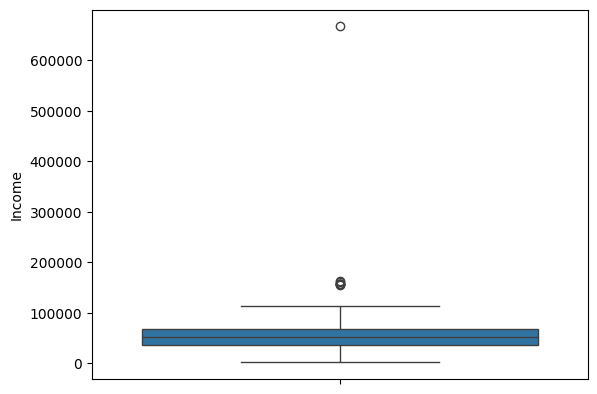

In [124]:
sns.boxplot(y = df_clean['Income'], data = df_clean);

Змінна Income має незначну кількість викидів, отже кращим рішенням буде заповнити пропущені значення медіанним значенням.

In [125]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
df_clean[['Income']] = median_imputer.fit_transform(df[['Income']])


**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

Колонку з датою ми вже обробили вище.  

Щодо категоріальних змінних Education та Marital_Status доцільніше за все використати One Hot Encoder.
Можна також спробувати Ordinal Encoder для змінної Education, проте я не впевнена, що зазначені рівні освіти мають однаковий діапазон одна від одної. Тому безпечніше використати One Hot.

In [126]:
df_clean['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [127]:
df_clean['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


Змінна Marital_Status має з категорії з незначною кількістю входжень. Краще об'єднати їх в одну категорію Other щоб не створювати зайвих фіч

In [128]:
rare_vals = ['Alone', 'Absurd', 'YOLO']
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace(rare_vals, 'Other')

In [129]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['Education', 'Marital_Status']

ohe = OneHotEncoder(
    drop=None,
    handle_unknown='ignore',
    sparse_output=False
)

X_cat = ohe.fit_transform(df_clean[cat_cols])
ohe_cols = ohe.get_feature_names_out(cat_cols)

df_cat_ohe = pd.DataFrame(X_cat, columns=ohe_cols, index=df_clean.index)

df_model = pd.concat(
    [df_clean.drop(columns=[c for c in cat_cols if c in df_clean.columns]),
     df_cat_ohe],
    axis=1
)

In [130]:
df_model.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure_days,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68.00,4754.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71.00,4204.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,71613.00,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60.00,4403.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,26646.00,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41.00,4230.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,58293.00,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44.00,4252.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [131]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [132]:
X = df_model

In [133]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.60


Отримане значення метрики доволі непогане. Це означає, що модель розподілила дані на кластери, які мають відмінності один від одного.

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [134]:
import plotly.express as px

X_clusters = X.copy()
X_clusters['cluster'] = labels.astype(int)
X_clusters['cluster'] = X_clusters['cluster'].astype(str)

In [135]:
X_clusters.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure_days,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,cluster
0,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68.00,4754.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1
1,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71.00,4204.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0
2,71613.00,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60.00,4403.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1
3,26646.00,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41.00,4230.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0
4,58293.00,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44.00,4252.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1


In [136]:
X_clusters['cluster'].value_counts()

,count
cluster,
0,1167
1,1072
2,1


In [137]:
fig = px.scatter_3d(
    X_clusters,
    x="Income",
    y="MntGoldProds",
    z="Recency",
    color="cluster",
    hover_data=['Age','NumStorePurchases']
)
fig.show()

Модель розділила дані на 3 кластера. 0 та 1 кластери розподілились майже порівну, 2 кластер містить лише 1 екземпляр.

Як бачимо, розподіл за вибраними для візуалізації ознаками доволі чіткий:  
- 1 (червоний) кластер - це користувачі, які мають дохід до 50 тисяч і менші суми, витрачені на придбання виробів із золота. Цікаво, що саме цей кластер має входження з нетипово високими сумами покупок (викидами). З цього можемо зробити висновок, що змінна Income має більший вплив для моделі.  
- 0 (синій) кластер - це користувачі з доходом більше 50 тисяч, так само як і в 1 кластері є постійними покупцями, частиіше і, в середньому, на більші суми купляють вироби з золота. Тут так само відмічаємо наявність екземплярів, з більш високий рівень доходу.  
- 2 (зелений) кластер - утворився через наявність викидів у змінній Income. До нього було віднесено один єдиний екземпляр.  

Видалимо з даних екземпляр, що має екстремально високе значення Income і ще раз натренуємо модель.

In [138]:
X_no_outlier = X[X['Income'] < 140000].copy()
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_no_outlier)

labels = kmeans.predict(X_no_outlier)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_no_outlier, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

X_no_outlier_clusters = X_no_outlier.copy()
X_no_outlier_clusters['cluster'] = labels.astype(int)
X_no_outlier_clusters['cluster'] = X_no_outlier_clusters['cluster'].astype(str)

Silhouette Coefficient for the data Dataset Clusters: 0.55


In [139]:
fig = px.scatter_3d(
    X_no_outlier_clusters,
    x="Income",
    y="MntGoldProds",
    z="Recency",
    color="cluster",
    hover_data=['Age','NumStorePurchases']
)
fig.show()

Тепер результат набагато краще!  
Маємо доволі високе значення метрики силуету - 0.54 та візуально чітке розділення на 3 кластери:  
Cluster 0 (зелений):
- Переважно низький/середній дохід.  
- Низькі витрати на золото (MntGoldProds).  
- Відносно рівномірний розподіл по давності (Recency).  
Це може бути сегмент «звичайних/економних клієнтів».  

Cluster 1 (червоний):  
- Більш високий дохід.  
- Більш високі витрати на золото.  
- Помітно більша частка клієнтів з давніми покупками.  
Це можуть бути клієнти «заможні, але неактивні».  

Cluster 2 (синій):  
- Середній дохід.  
- Теж витрачають на золото, але менше ніж кластер 1.  
- Recency низьке - ці клієнти недавно купували.  
Це сегмент «активні покупці з середнім доходом».

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

Масштабуємо наші дані за допомогою Standart Scaler. Оскільки деякі змінні вже мають бінарне значення, вони не братимуть участі в масштабуванні.

In [140]:
from sklearn.preprocessing import StandardScaler

ohe_cols = df_cat_ohe.columns.to_list()
binary_cols = [
    'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
    'AcceptedCmp1','AcceptedCmp2','Complain','Response'
]

num_cols = [c for c in X_no_outlier.columns
            if c not in binary_cols + ohe_cols]

scaler = StandardScaler()
X_scaled_num = pd.DataFrame(
    scaler.fit_transform(X_no_outlier[num_cols]),
    columns=num_cols,
    index=X_no_outlier.index
)

X_scaled = pd.concat(
    [X_scaled_num, X_no_outlier[binary_cols], X_no_outlier[ohe_cols]],
    axis=1
)

In [141]:
X_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Tenure_days,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.32,-0.83,-0.93,0.31,0.98,1.55,1.74,2.46,1.47,0.84,0.36,1.41,2.63,-0.56,0.69,1.02,1.53,0,0,0,0,0,0,1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,-0.26,1.03,0.91,-0.38,-0.87,-0.64,-0.73,-0.65,-0.63,-0.73,-0.17,-1.12,-0.59,-1.17,-0.14,1.27,-1.19,0,0,0,0,0,0,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0.97,-0.83,-0.93,-0.80,0.36,0.57,-0.17,1.34,-0.15,-0.04,-0.70,1.41,-0.23,1.29,-0.55,0.33,-0.21,0,0,0,0,0,0,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,-1.21,1.03,-0.93,-0.80,-0.87,-0.56,-0.66,-0.51,-0.58,-0.75,-0.17,-0.76,-0.94,-0.56,0.28,-1.29,-1.06,0,0,0,0,0,0,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.32,1.03,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.42,0.33,0.13,0.06,-0.14,-1.04,-0.95,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00


In [142]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_scaled)

labels = kmeans.predict(X_scaled)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.19


In [143]:
X_scaled_clusters = X_scaled.copy()
X_scaled_clusters['cluster'] = labels.astype(int)
X_scaled_clusters['cluster'] = X_scaled_clusters['cluster'].astype(str)
X_scaled_clusters['cluster'].value_counts()

,count
cluster,
0,1012
1,617
2,603


In [144]:
fig = px.scatter_3d(
    X_scaled_clusters,
    x="Income",
    y="MntGoldProds",
    z="Recency",
    color="cluster",
    hover_data=['Age','NumStorePurchases']
)
fig.show()

Подивимось на результати на немасштабованих даних

In [145]:
X_real_clusters = X_no_outlier.copy()
X_real_clusters['cluster'] = labels.astype(int)
X_real_clusters['cluster'] = X_real_clusters['cluster'].astype(str)

fig = px.scatter_3d(
    X_real_clusters,
    x="Income",
    y="MntGoldProds",
    z="Recency",
    color="cluster",
    hover_data=['Age','NumStorePurchases']
)
fig.show()

Масштабування числових змінних дало негативний ефект на результати кластеризації. Бачимо, що тепер кластери немають чітких кордонів. Метрика силуету на рівні 0.19 так само це підтверджує.  

Отже висновок - в даному кейсі доцільніше використовувати не масштабовані дані.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

Зробила це вище

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

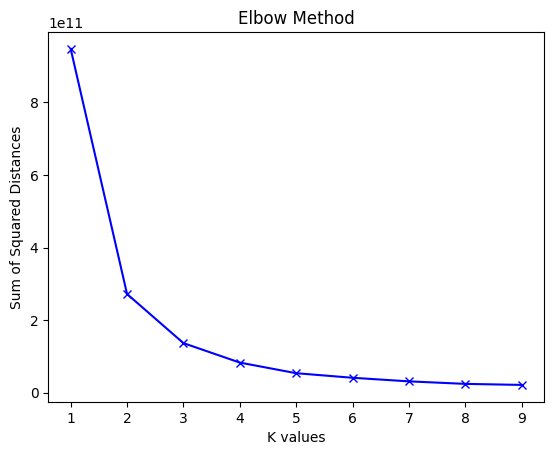

In [146]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_no_outlier)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

З візуалізації бачимо, що оптимальна кількість кластерів - 3 кластери. Саме після значення 3 сума квадратів помилок спадає не так стрімко, як до цього.    Для перевірки, натренуємо нашу модель на 4 кластерах і порівняємо зі значеннями, отриманими раніше.

In [147]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X_no_outlier)

labels = kmeans.predict(X_no_outlier)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_no_outlier, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

X_no_outlier_clusters = X_no_outlier.copy()
X_no_outlier_clusters['cluster'] = labels.astype(int)
X_no_outlier_clusters['cluster'] = X_no_outlier_clusters['cluster'].astype(str)

Silhouette Coefficient for the data Dataset Clusters: 0.53


In [148]:
fig = px.scatter_3d(
    X_no_outlier_clusters,
    x="Income",
    y="MntGoldProds",
    z="Recency",
    color="cluster",
    hover_data=['Age','NumStorePurchases']
)
fig.show()

Метрика силуету зовсім трохи нажча, ніж при кластеризації на 3 кластери, проте для бізнес задачі така кластеризація має бульше сенсу, оскільки тепер більше зрозумілі стратегії взаємодії з такими покупцями.  
Cluster 3 (фіолетовий):  
- Низький дохід і низькі витрати
Це «low value customers», які мало витрачають.
Стратегія: масштабні дешеві кампанії (email, push), щоб нагадати про бренд.

Cluster 0 (червоний):  
- Середній дохід і середні витрати
Це стабільна «середня база» клієнтів.
Стратегія: підвищення лояльності через акції, бонуси та персоналізовані рекомендації, щоб стимулювати більші витрати.

Cluster 2 (синій):
- Високі доходи і значні витрати
Найцінніші клієнти («premium» сегмент), які вже показали високий рівень витрат.
Стратегія: VIP-програми, ексклюзивні пропозиції, персональні менеджери, щоб утримати їх у довгостроковій перспективі.

Cluster 1 (зелений):
- Доходи більше середнього так само як і витрати
Це можуть бути «нішеві» або сезонні покупці.
Стратегія: знайти спільні риси (наприклад, витрачають на конкретні продукти) й зробити таргетовані акції саме під ці категорії.

Варто подивитись на візуалізацію по іншим змінним

In [149]:
fig = px.scatter_3d(
    X_no_outlier_clusters,
    x="Age",
    y="MntMeatProducts",
    z="Tenure_days",
    color="cluster",
    hover_data=['Income']
)
fig.show()

Як бачимо з візуалізації, найбільший вплив на кластеризацію має саме змінна MntMeatProducts, проте як бачимо, по цій змінній кластери доволі змішані і не мають чітких кордонів. Це може бути пов'язано з тим, що м'ясо є одним з основних продуктів харчування і, мабуть, доступну ціну.  

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [150]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

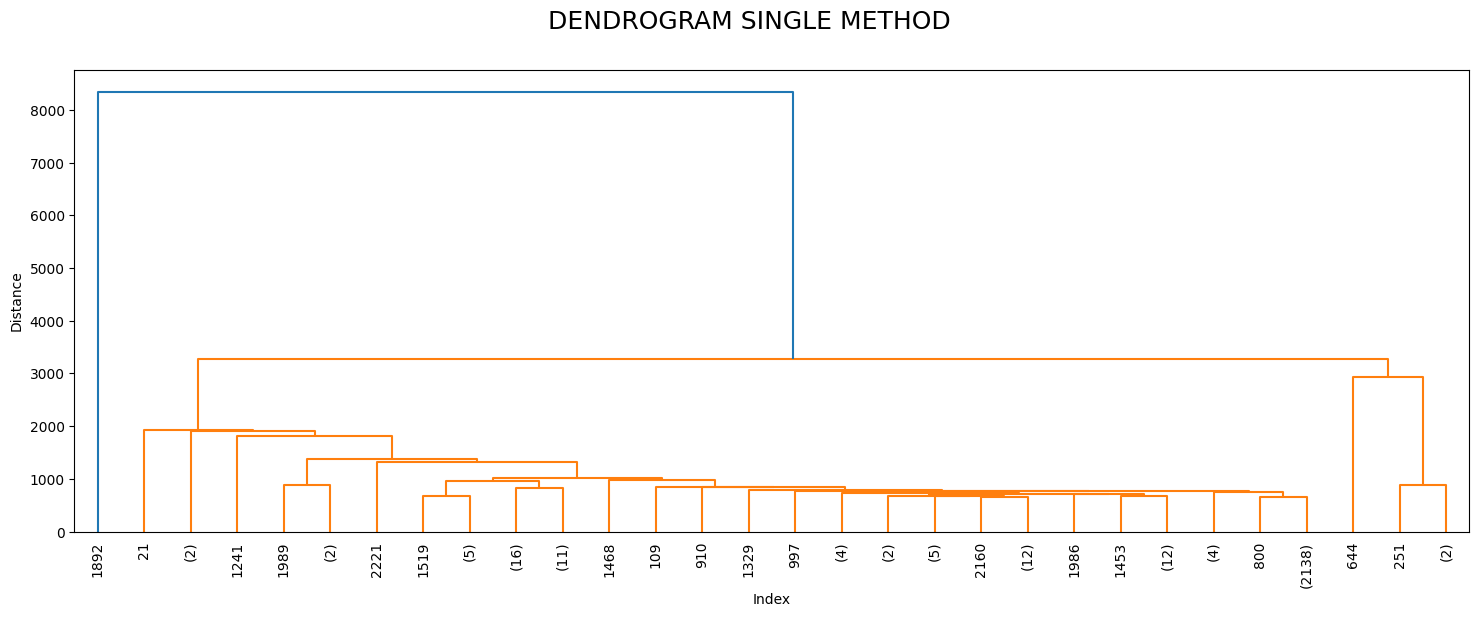

In [151]:
dist_sin = linkage(X_no_outlier, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

На дендрограмі видно, що оптимально виділити 3 кластери, бо саме на цьому рівні утворюється зрозуміле розділення. Якщо ж поділити лише на 2 кластери, то групи будуть ще більш відмінні між собою, але втратиться деталізація всередині даних. В той самий час, якщо використати 4 кластери, то можемо отримати два з них з дуже малою різницею. Проаналізуємо всі варіанти із зазначених

In [152]:
X_no_outlier_hierarchy = X_no_outlier.copy()
X_no_outlier_hierarchy['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_no_outlier_hierarchy['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')
X_no_outlier_hierarchy['4_clust'] = fcluster(dist_sin, 4, criterion='maxclust')

In [153]:
X_no_outlier_hierarchy.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure_days,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,2_clust,3_clust,4_clust
0,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,68.00,4754.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1,1,1
1,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,71.00,4204.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1,1,1
2,71613.00,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,60.00,4403.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1,1,1
3,26646.00,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,41.00,4230.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1,1,1
4,58293.00,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44.00,4252.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1,1,1


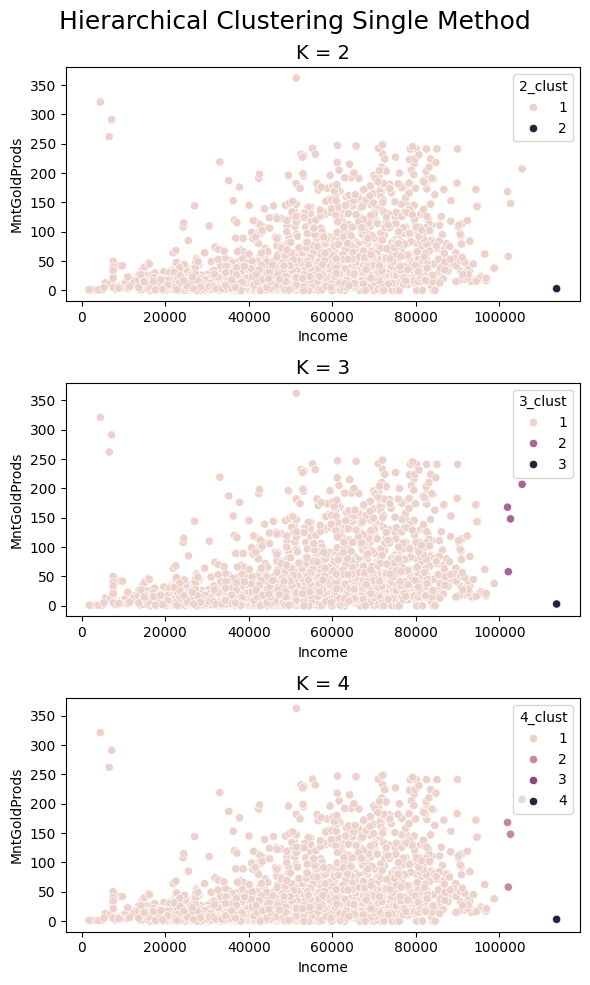

In [154]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income",y="MntGoldProds", data=X_no_outlier_hierarchy, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Income",y="MntGoldProds", data=X_no_outlier_hierarchy, hue="3_clust")

plt.subplot(3,1,3)
plt.title("K = 4",fontsize=14)
sns.scatterplot(x="Income",y="MntGoldProds", data=X_no_outlier_hierarchy, hue="4_clust")
plt.tight_layout();

In [155]:
score = metrics.silhouette_score(X_no_outlier_hierarchy, X_no_outlier_hierarchy['2_clust'], metric='euclidean')
print(f"Silhouette score (k=2): {score:.3f}")

Silhouette score (k=2): 0.557


In [156]:
score = metrics.silhouette_score(X_no_outlier_hierarchy, X_no_outlier_hierarchy['3_clust'], metric='euclidean')
print(f"Silhouette score (k=3): {score:.3f}")

Silhouette score (k=3): 0.451


In [157]:
score = metrics.silhouette_score(X_no_outlier_hierarchy, X_no_outlier_hierarchy['4_clust'], metric='euclidean')
print(f"Silhouette score (k=4): {score:.3f}")

Silhouette score (k=4): 0.440


Недивлячись на прийнятні показники метрики силуету, на візуалізації чітко видно, що кластеризація набагато гірша ніж за допомогою K-Means. Більшість екземплярів визначена як 1 кластер інші ж кластери мають поодинокі входження.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

На цей раз спробуємо інший метод, а саме ward. Він на кожному кроці обирає ті кластери, що дають найменший приріст дисперсії і намагається зробити кластери схожими за розміром і формою.

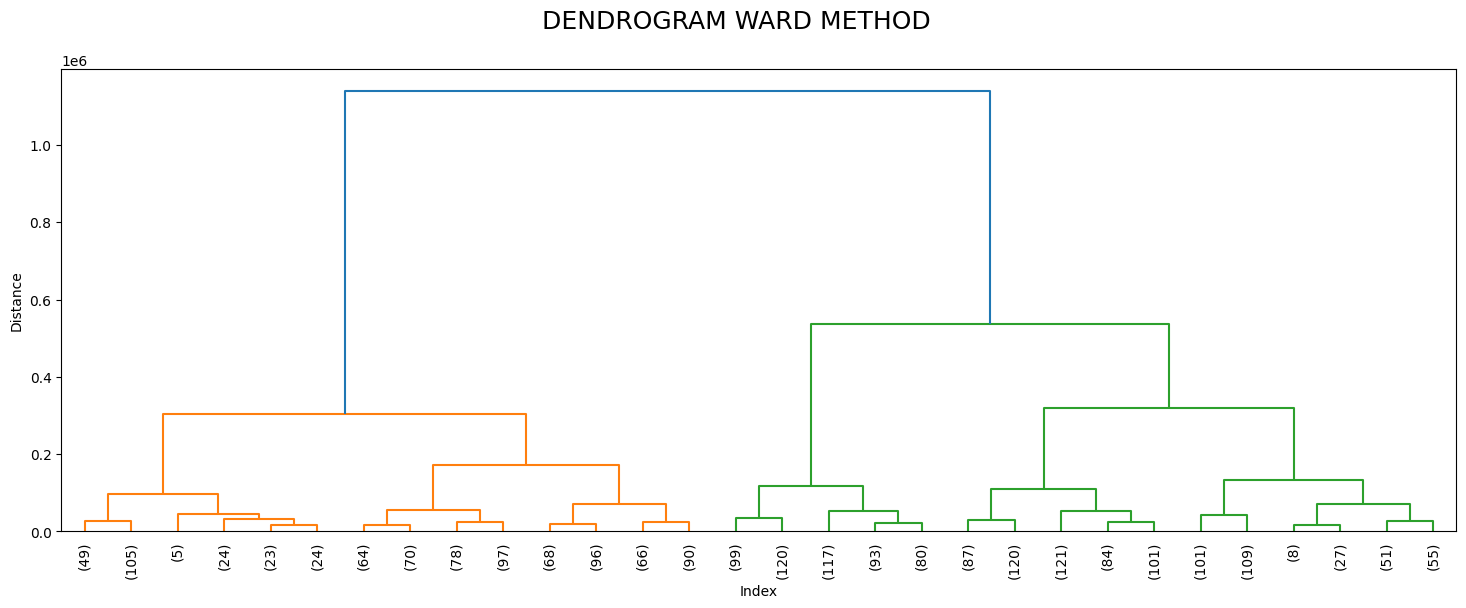

In [161]:
dist_ward = linkage(X_no_outlier, method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_ward, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM WARD METHOD",fontsize=18)
plt.show()

На дендрограмі видно, що оптимально виділити 3 або навіть 5 кластерів. Ми проаналізуємо три варіанти, щоб порівняти з попередніми результатами.

In [159]:
X_no_outlier_hierarchy_ward = X_no_outlier.copy()
X_no_outlier_hierarchy_ward['2_clust'] = fcluster(dist_ward, 2, criterion='maxclust')
X_no_outlier_hierarchy_ward['3_clust'] = fcluster(dist_ward, 3, criterion='maxclust')
X_no_outlier_hierarchy_ward['5_clust'] = fcluster(dist_ward, 5, criterion='maxclust')

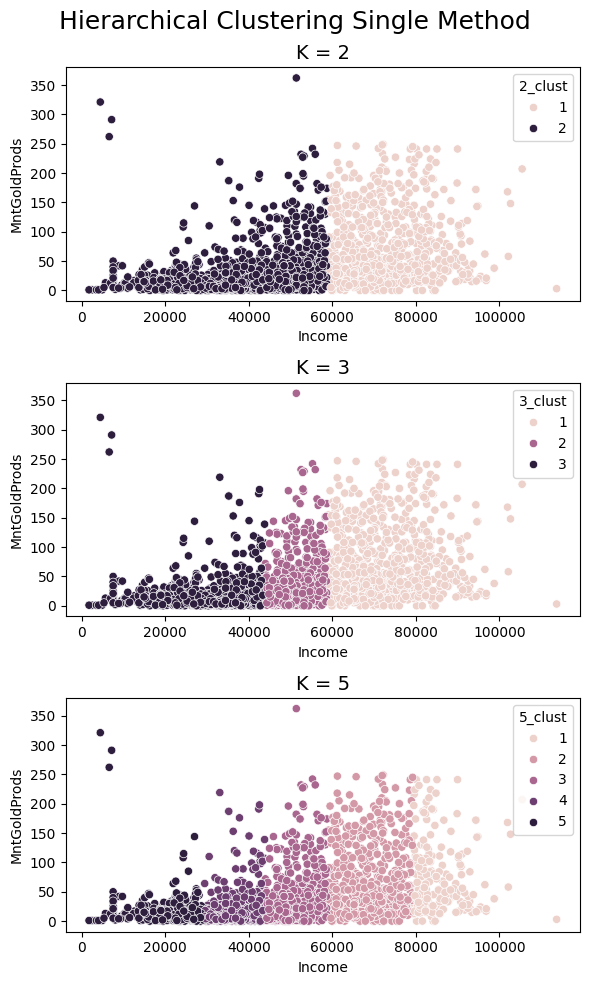

In [166]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income",y="MntGoldProds", data=X_no_outlier_hierarchy_ward, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Income",y="MntGoldProds", data=X_no_outlier_hierarchy_ward, hue="3_clust")

plt.subplot(3,1,3)
plt.title("K = 5",fontsize=14)
sns.scatterplot(x="Income",y="MntGoldProds", data=X_no_outlier_hierarchy_ward, hue="5_clust")
plt.tight_layout();

In [167]:
score = metrics.silhouette_score(X_no_outlier_hierarchy_ward, X_no_outlier_hierarchy_ward['2_clust'], metric='euclidean')
print(f"Silhouette score (k=2): {score:.3f}")

Silhouette score (k=2): 0.582


In [168]:
score = metrics.silhouette_score(X_no_outlier_hierarchy_ward, X_no_outlier_hierarchy_ward['3_clust'], metric='euclidean')
print(f"Silhouette score (k=3): {score:.3f}")

Silhouette score (k=3): 0.497


In [169]:
score = metrics.silhouette_score(X_no_outlier_hierarchy_ward, X_no_outlier_hierarchy_ward['5_clust'], metric='euclidean')
print(f"Silhouette score (k=5): {score:.3f}")

Silhouette score (k=5): 0.515


На цей раз результат набагато кращий. Доволі високі значення метрики силуету для 2 та 5 кластерів. Трохи нижчий для 3 кластерів. Проте, для бізнес задач мабуть краще використати розділення на 5 кластерів, щоб створити більш персоналізовані підходи для кожного з кластерів.

In [171]:
fig = px.scatter_3d(
    X_no_outlier_hierarchy_ward,
    x="Income",
    y="MntGoldProds",
    z="Recency",
    color="5_clust",
    hover_data=['Age','NumStorePurchases']
)
fig.show()

Дана кластеризація дійсно може бути корисною